In [95]:
from nba_py import player
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests 

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)


%matplotlib inline

In [143]:
bpm = pd.read_csv("lebron - BPM per playoffs.csv").iloc[:,1:8]
vorp = pd.read_csv("lebron - VORP per playoffs.csv").iloc[:,1:8]
# print(bpm.columns.values[1:-1])
df = bpm.merge(vorp, on=['Player', 'Season', 'Age', 'Tm', 'Lg', 'G'])
df = df[(df.BPM != 'BPM') & (df.VORP != 'VORP')]
df.VORP = df.VORP.astype(float)
df.BPM = df.BPM.astype(float)
# df.dtypes
df.reset_index(inplace=True)

In [157]:
players = df.Player.unique()
playerList = [x.lower().split(" ") for x in players]
# print(player.get_player('lebron', 'james', only_current=0))
ids = [player.get_player(p[0],p[1]) for p in playerList]

ids = [i.tolist()[0] for i in ids]
    

In [158]:
for i in ids:
    
    url = 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/{}.png'.format(i)
    r = requests.get(url)
    
    open('{}.jpg'.format(i), 'wb').write(r.content)


In [159]:
df2 = pd.DataFrame({'Player': players,
     'playerID': ids
    })
df3 = df.merge(df2, on='Player', how='left')
df3.head()

,index,Player,Season,Age,Tm,Lg,G,BPM,VORP,playerID
0,0,LeBron James,2017-18,33,CLE,NBA,18,14.7,3.1,2544
1,1,Michael Jordan,1989-90,26,CHI,NBA,16,14.3,2.8,893
2,2,Michael Jordan,1990-91,27,CHI,NBA,17,13.8,2.8,893
3,3,LeBron James,2015-16,31,CLE,NBA,21,13.1,3.1,2544
4,4,Michael Jordan,1988-89,25,CHI,NBA,17,12.8,2.7,893


Text(0,0.5,'VORP')

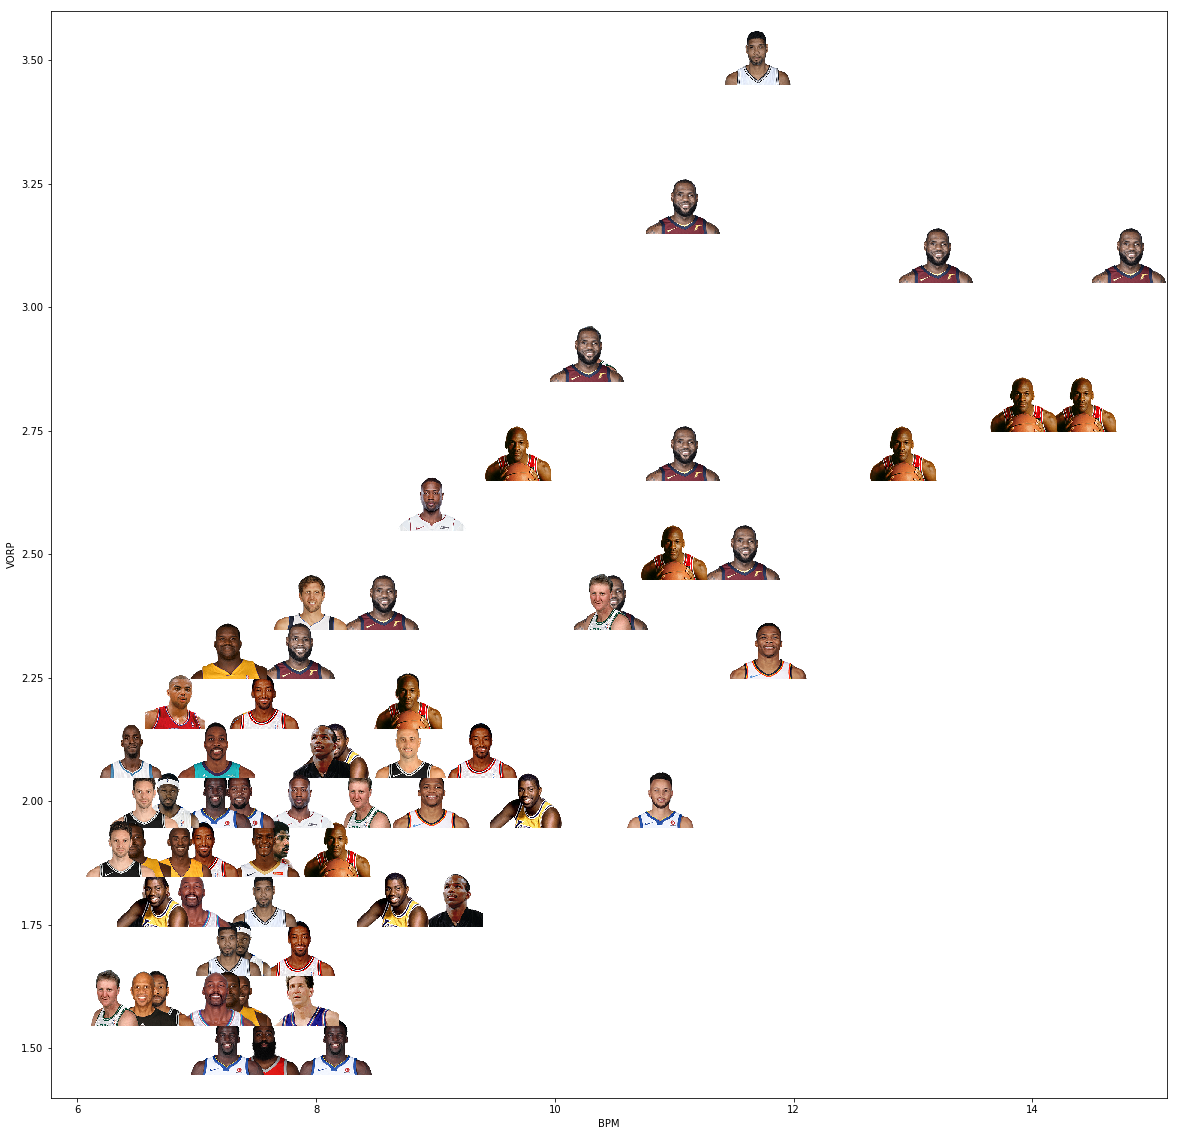

In [187]:


fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)


# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
groups = df3.groupby('Player')
for name, group in groups:
    ax.plot(group.BPM, group.VORP, marker='', linestyle='', ms=12, label=name)

for n in range(df3.shape[0]):
    
    try: 
        arr_img = plt.imread("{}.jpg".format(df3.playerID[n]), format='jpg')
        imagebox = OffsetImage(arr_img, zoom=0.3)
        ab = AnnotationBbox(imagebox, (df3.BPM[n],df3.VORP[n]),
                        xycoords='data',
                        frameon=False,
                        boxcoords="offset points",
                        
                        )

        ax.add_artist(ab)
    except OSError:
        pass
#         print(n)
    # imagebox.image.axes = ax

    
    
# ax.legend()
ax.set_xlabel('BPM')
ax.set_ylabel('VORP')